In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [53]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
#     for x in os.listdir(path):
#         if x[19:21] == band and file[23:37]==x[27:41]:
#             return x
#     print(file)
    for x in os.listdir(path):
        if x[19:21] == band and file[27:41]==x[27:41]:
            return x
    print(file)

def find_07and14(path):
    """
    Returns loaded .npy of bands 07 and 14.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    """
#     file = random.choice(os.listdir(path))
#     file07 = None
#     file14 = None
#     while file07 == None or file14 == None:
#         file07 = find_npy_file(path, file, '07')
#         file14 = find_npy_file(path, file, '14')
#         file = random.choice(os.listdir(path))
#     file07 = np.load(path + file07)
#     file14 = np.load(path + file14)
#     return file07, file14
    file = random.choice(os.listdir('../../GOES_Files/npy_files'))
#     while file14 == None:
    file07 = find_npy_file('../../GOES_Files/npy_files', file, '07')
    file14 = find_npy_file('../../GOES_Files/npy_files', file, '14')
#     file = random.choice(os.listdir('../../GOES_Files/npy_files'))

#         file = random.choice(os.listdir(path))
    file07 = np.load('../../GOES_Files/npy_files/' + file07)
    file14 = np.load('../../GOES_Files/npy_files/' + file14)
    return file07, file14

In [3]:
def firemin(img07, img14):
    max07 = 0
    max14 = 0
    img07ravel = img07.ravel()
    img14ravel = img14.ravel()
    for x in range(500*500):
        if img14ravel[x] > max14 and abs(img14ravel[x] - img07ravel[x]) < 10:
            max07 = img07ravel[x]
            max14 = img14ravel[x]
    return max07, max14

# Finding Threshold

In [4]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'
diffs = []

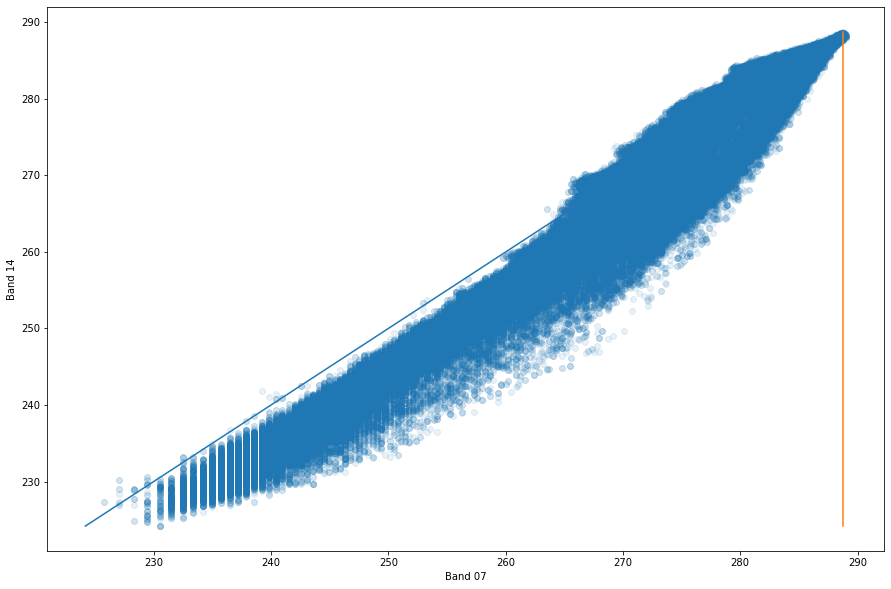

(288.7823, 288.76035)


In [5]:
file07 = None
file14 = None
while file07 == None or file14 == None:
    CM = random.choice(os.listdir(pathCM))
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')

img07 = np.load(path + file07)
img14 = np.load(path + file14)

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.scatter(img07, img14, alpha=0.1)
    
plt.plot([img14.min(), img14.max()], [img14.min(), img14.max()], label='x=y')
maxs = firemin(img07, img14)
plt.plot([maxs[0], maxs[0]], [img14.min(), maxs[1]], label='fires')
# plt.plot([mins[0], maxs[0]], [mins[1], maxs[1]], label='fires')
plt.xlabel('Band 07')
plt.ylabel('Band 14')

plt.show()

print(maxs)

In [6]:
diffs.append(maxs[1] - maxs[0])

In [7]:
diffs

[-0.021942139]

# Finding Slope

In [8]:
def bottom_pt(img07, img14):
    max07 = 0
    min14 = 300
    img07ravel = img07.ravel()
    img14ravel = img14.ravel()
    img14min = img14ravel.min()
    img14max = img14ravel.max()
    for x in range(500*500):
#         if img07ravel[x] > max07 and img14ravel[x] < min14:
        if img07ravel[x] > max07 and img14ravel[x] - img14min < (img14max-img14min)/2:
            max07 = img07ravel[x]
            min14 = img14ravel[x]
    return max07, min14

In [9]:
bottom_pt(img07, img14)

(273.70584, 255.79756)

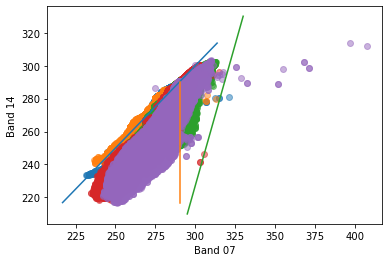

In [86]:
for n in range(5):
    img07, img14 = find_07and14(pathCM)
    
    if n == 0:
        total07 = img07
        total14 = img14
    else:
        total07 = np.concatenate((total07, img07))
        total14 = np.concatenate((total14, img14))
    
    plt.scatter(img07, img14, alpha=0.5)
    
plt.plot([total14.min(), total14.max()], [total14.min(), total14.max()], label='x=y')
maxs = firemin(total07, total14)
plt.plot([maxs[0], maxs[0]], [total14.min(), maxs[1]], label='fires')
plt.plot([295, 330], [210, 330], label='fires2')
# plt.plot([total14.max(), total14.max()], [total14.min(), total14.max()], label='14 max')
plt.xlabel('Band 07')
plt.ylabel('Band 14')
plt.show()